# A behavioural analog to BCI training : results

Statistics and simple plots of the results of the experiment (technical test). 

This notebook does not figure much computational modeling (yet).


Let's start by importing the necessary packages as well as the data : 

## 1. Loading the data from each task !
A few plots to show how the participants demographics compared.

In [24]:
import numpy as np
import sys,os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import plotly as pltly
import plotly.express as px
import plotly.graph_objects as go

# + local functions : 
from database_handling.database_extract import get_all_subject_data_from_internal_task_id
from utils import remove_by_indices

import jax
import jax.numpy as jnp

from analysis_tools.llm_interrogation import ask_llm


SAVEPATH = os.path.join("results","llm_classifications","29_01.data")

# We import the data of two separate tasks : 
FULL_DATA = {}

# Import the data from the remote mongodb database & the imported prolific demographics :
internal_task_id = "002"

# Except subjects for predictors :
problematic_subjects_misc = ["5c9cb670b472d0001295f377"]
        # This subject has read the instructions with one submission and ran
        # the actual task with another, rendering statistics computed impossible to 
        # compare, this should be substracted from any statistical models based on
        # instructional data, but can be kept for raw performance plots.
# problematic_subjects_fraudulent =["6595ae358923ce48b037a0dc"]
        # This subject has very suspicious responses, including always putting both points in the same place
        # and acting as quickly as possible, to be removed from all analysis ?

tasks_results_002 = get_all_subject_data_from_internal_task_id(internal_task_id,override_save=False)
print("Loaded the task results for " + str(len(tasks_results_002)) + " subjects.")

# Each subject in task results has the following entries : 
# TASK_RESULT_FEATURES, TASK_RESULTS_EVENTS, TASK_RESULTS_DATA, TASK_RESULTS,RT_FB
remove_these_subjects = []
for index,entry in enumerate(tasks_results_002):
    subj_dict,_,_,_ = entry
    subj_name = subj_dict["subject_id"]
    if subj_name in problematic_subjects_misc:
        remove_these_subjects.append(index)

tasks_results_002_filtered = remove_by_indices(tasks_results_002,remove_these_subjects)
print(str(len(tasks_results_002_filtered)) + " subjects remaining after removing problematic subjects.")

FULL_DATA[internal_task_id] = tasks_results_002_filtered


# Import the data from the remote mongodb database & the imported prolific demographics :
internal_task_id = "003"
# Study 1 : the std of the gauge is chosen randomly between 0.0 and 0.25
PROLIFIC_STUDY_IDs = ["66f96c31e69227986334a027","66d086503c0a69291c361b67"]
# Except subjects for predictors :
problematic_subjects_misc = ["615c1741d4630b25e6bc1cb9"]
                # This subject had 7 entries in the incomplete database, and likely restarted the task once
                # probably due to a technical error.

tasks_results_0031 = []
for prolific_study_id in PROLIFIC_STUDY_IDs:
    task_results = get_all_subject_data_from_internal_task_id(internal_task_id,prolific_study_id,override_save=False)
    print(" - Loaded the task results for study {} \n    ({} subjects.)".format(prolific_study_id,len(task_results)))
    tasks_results_0031 += task_results
print("Total : {} subjects".format(len(tasks_results_0031)))

# Each subject in task results has the following entries : 
# TASK_RESULT_FEATURES, TASK_RESULTS_EVENTS, TASK_RESULTS_DATA, TASK_RESULTS,RT_FB
remove_these_subjects = []
for index,entry in enumerate(tasks_results_0031):
    subj_dict,_,_,_ = entry
    subj_name = subj_dict["subject_id"]
    if subj_name in problematic_subjects_misc:
        remove_these_subjects.append(index)

tasks_results_0031_filtered = remove_by_indices(tasks_results_0031,remove_these_subjects)
print(str(len(tasks_results_0031_filtered)) + " subjects remaining after removing problematic subjects.")

FULL_DATA["003_1"] = tasks_results_0031_filtered

print([len(s) for s in FULL_DATA.values()])


# Import the data from the remote mongodb database & the imported prolific demographics :
internal_task_id = "003"
# Study 2 : the std of the was 0.025,0.1 and 0.175
PROLIFIC_STUDY_IDs = ["6703ab18d345eaa4893587e0","66f9aee8210357265a5958fc","6703ab1a7ea30557549dc6da"]

# Except subjects for predictors :
problematic_subjects_misc = ["611d60c383f4f70ff4bc99fd", # S2 : Did the task twice 
                             "66a74bdfdcaccdc0703894d5", # Consent revoked 
                            "667d92f2ea5c1542f417285d",
                            "6548f570022275786186ffbd"]
# problematic_subjects_fraudulent =["66bb5c09526e6d80f1146800"]
                # This subject had "eclectic performances" so say the least
                # Left fullscreen twice and missed 4 actions

tasks_results_0032 = []
for prolific_study_id in PROLIFIC_STUDY_IDs:
    task_results = get_all_subject_data_from_internal_task_id(internal_task_id,prolific_study_id,override_save=False)
    print(" - Loaded the task results for study {} \n    ({} subjects.)".format(prolific_study_id,len(task_results)))
    tasks_results_0032 += task_results
print("Total : {} subjects".format(len(tasks_results_0032)))

# Each subject in task results has the following entries : 
# TASK_RESULT_FEATURES, TASK_RESULTS_EVENTS, TASK_RESULTS_DATA, TASK_RESULTS,RT_FB
remove_these_subjects = []
for index,entry in enumerate(tasks_results_0032):
    subj_dict,_,_,_ = entry
    subj_name = subj_dict["subject_id"]
    if subj_name in problematic_subjects_misc:
        remove_these_subjects.append(index)

tasks_results_0032_filtered = remove_by_indices(tasks_results_0032,remove_these_subjects)
print(str(len(tasks_results_0032_filtered)) + " subjects remaining after removing problematic subjects.")

FULL_DATA["003_2"] = tasks_results_0032_filtered

print([len(s) for s in FULL_DATA.values()])

Loaded the task results for 90 subjects.
89 subjects remaining after removing problematic subjects.
 - Loaded the task results for study 66f96c31e69227986334a027 
    (16 subjects.)
 - Loaded the task results for study 66d086503c0a69291c361b67 
    (40 subjects.)
Total : 56 subjects
55 subjects remaining after removing problematic subjects.
[89, 55]
 - Loaded the task results for study 6703ab18d345eaa4893587e0 
    (49 subjects.)
 - Loaded the task results for study 66f9aee8210357265a5958fc 
    (50 subjects.)
 - Loaded the task results for study 6703ab1a7ea30557549dc6da 
    (50 subjects.)
Total : 149 subjects
145 subjects remaining after removing problematic subjects.
[89, 55, 145]


In [2]:

for task_id,task_results in FULL_DATA.items():
    # Warning, the questions asked may vary based on the task ID !
    print("According to you, what was the best strategy in order to control the gauge level ? In retrospect, what other strategy should you have attempted ? (Try to answer as precisely as possible.)")
    print("__________________________________________________________________________")
    for subject_results in task_results:
        subject_dict,trial_data,events,fb_rtv = subject_results
        print("-> " + subject_dict["mandatory_q2"])
        # print("-> " + subject_dict["Nationality"])
    print()
    print("Did you notice any technical issues (buttons not working, graphical bugs, etc.) ? If yes, how did they appear ?")
    print("__________________________________________________________________________")
    for subject_results in task_results:
        subject_dict,trial_data,events,fb_rtv = subject_results
        print("-> " + subject_dict["optional_q1"])
    print() 
    print("The instructions were meant to help you understand the task before it started. How clear did you find them ? What would you change to make them clearer ?")
    print("__________________________________________________________________________")
    for subject_results in task_results:
        subject_dict,trial_data,events,fb_rtv = subject_results
        print("-> " + subject_dict["optional_q2"])
    print() 
    print("Do you think there was a logic behind how the gauge responded ? How hard / frustrating did you find the task ? Other remarks ?")
    print("__________________________________________________________________________")
    for subject_results in task_results:
        subject_dict,trial_data,events,fb_rtv = subject_results
        print("-> " + subject_dict["optional_q3"])
    print() 

According to you, what was the best strategy in order to control the gauge level ? In retrospect, what other strategy should you have attempted ? (Try to answer as precisely as possible.)
__________________________________________________________________________
-> 1st click on the bottom left corner, 2nd click on the top right corner
-> The strategy that i found was putting the points at the high level of the gray screen. I think the gauge level increases when the points are higher than the current level. I should have tried more what I mentioned last, because now that im thinking about it sometimes i didn't do it. In the beginning instead, i didnt understand at all how it worked. after a bunch of trials i figured out in order for it to be full my points should be higher. 
-> to start low and move higher each step
-> I tried to check all the spaces in the grey area. 
After that, I tried to notice when the gauge level went up accordingly to where I clicked.
If it went up, I repeat thos

## 2. Get the agents 
Load the LLM agents that will attempt to rate the text answers of our participants.


We used LM-studio and mounted an empirically chosen agent (Qwen2.5-Coder-32B-Instruct-GGUF/qwen2.5-coder-32b-instruct-q2_k.gguf) sourced from HuggingFace.

Let's check that it works !

In [3]:
from openai import OpenAI


# Connect to LM Studio
client = OpenAI(base_url="http://localhost:1234/v1", api_key="lm-studio")

# completion = client.chat.completions.create(
#   model="model-identifier",
#   messages=[
#     {"role": "system", "content": "You are an impartial agent tasked with classifying text answers in a cognitive behavioural task. You live in a Jupyter notebook. You always answer in rhymes."},
#     {"role": "user", "content": "Introduce yourself in 4 paragraphs."}
#   ],
#   temperature=0.7,
# )

# print(completion.choices[0].message.content)

## 3. Asking the real questions !

Let's indicate a set of questions asked to the subjects and how which categories we want our LLM to classify the subjects into :

Total : 90 subjects
89 subjects remaining after removing problematic subjects.
A total of 1557/9790 actions were missed. (15.90 %)
 - Loaded the task results for study 66f96c31e69227986334a027 
    (16 subjects.)
 - Loaded the task results for study 66d086503c0a69291c361b67 
    (40 subjects.)
Total : 56 subjects
55 subjects remaining after removing problematic subjects.
A total of 14/6050 actions were missed. (0.23 %)
 - Loaded the task results for study 6703ab18d345eaa4893587e0 
    (49 subjects.)
 - Loaded the task results for study 66f9aee8210357265a5958fc 
    (50 subjects.)
 - Loaded the task results for study 6703ab1a7ea30557549dc6da 
    (50 subjects.)
Total : 149 subjects
145 subjects remaining after removing problematic subjects.
A total of 33/15950 actions were missed. (0.21 %)
Index(['subject_id', 'task_code', 'lang', 'browser', 'N_trials', 'N_tmstps',
       'start_date', 'finish_date', 'finished_clock', 'completedTask',
       'N_exited_fullscreen', 'N_missed_actions', 'c

<Axes: xlabel='question_answer', ylabel='count'>

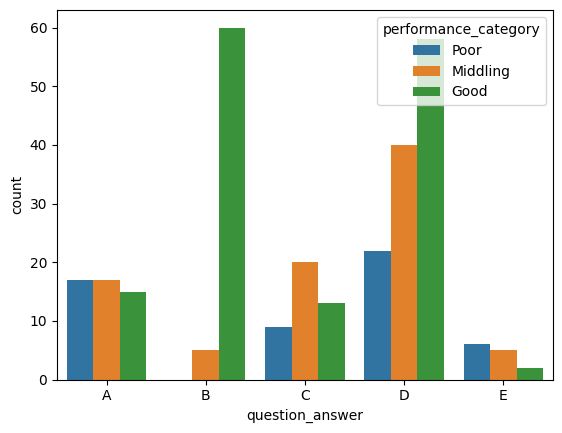

In [37]:
def llm_request_message(question,subject_answer) :    
    _general_role = "You are an impartial assistant tasked with classifying subject text responses from a behavioural experiment."
    _constraint = "Please answer using only the letter corresponding to your classification of the participant."
    
    _system_directive = "\n".join([_general_role,_constraint])
    
    _experiment_general = "The subjects of the experiment performed actions by placing two points (or arrows) on an unannotated grey screen. They had to learn how to control the level of a gauge using these points."
    _experiment_general_2 =  "The strategy to control the gauge using the points was ambiguous by design. Subjects had to find it by themselves through trial and error."
    _experiment_general_3 = "The gauge was actually controlled by the angle between the horizontal and the vector draw by the points. A 45° angle was optimal."
    _experiment_general_4 = "This means that the optimal strategy was to place the second point on the upper-right compared to the first point."
    _experiment_general_5 = "Placing the first point on the bottom-left corner and the second point on the top right corner also worked."
    _question = "At the end of the experiment, we asked subjects the following question : **{}**.".format(question["prompt"])
    _answer = "Here is the answer of the participant : **{}**".format(subject_answer)
    _task = "Your job is to classify the answer of the participant into one of the following categories :"    
    _categories = "\n".join([cat["letter"] + ". " + cat["content"] for cat in question["categories"]])
    
    _user_directive = "\n".join([_experiment_general,_experiment_general_2,_experiment_general_3,_experiment_general_4,_experiment_general_5,_question,_answer,_task,_categories,_constraint])
    
    
    
    messages=[
            {"role": "system", "content": _system_directive},
            {"role": "user", "content": _user_directive}
        ]
    return messages


question_1 = {
        "prompt":"According to you, what was the best strategy in order to control the gauge level ? In retrospect, what other strategy should you have attempted ? (Try to answer as precisely as possible.)",
        "categories":[
            {"letter" : "A", "content" : "The subject did not provide any answer to the question / The answer was off-topic."},
            {"letter" : "B", "content" : "The subject found the optimal strategy."},
            {"letter" : "C", "content" : "The subject found only part of the optimal strategy (e.g. placing points on top of each other, drawing an horizontal line, etc.)."},
            {"letter" : "D", "content" : "The subject thought he/she found the correct strategy but was mistaken."},
            {"letter" : "E", "content" : "The subject did not try any strategy"},
        ],
        "dict_key" : "mandatory_q2"
    }


question_2 = {
        "prompt":"Did you notice any technical issues (buttons not working, graphical bugs, etc.) ? If yes, how did they appear ?",
        "categories":[
            {"letter" : "A", "content" : "The subject did not provide any answer to the question / The answer was off-topic."},
            {"letter" : "B", "content" : "The subject did not encounter any issue."},
            {"letter" : "C", "content" : "The subject encountered only minor technical issues : display delays, lag, stuttering."},
            {"letter" : "D", "content" : "The subject encountered serious issues but only affected a limited amount of data (e.g. only in a few actions)."},
            {"letter" : "E", "content" : "The subject encountered catastrophic issues that impacted the gathering of meaningful data."},
        ],
        "dict_key" : "optional_q1"
    }

question_3 = {
        "prompt":"The instructions were meant to help you understand the task before it started. How clear did you find them ? What would you change to make them clearer ?",
        "categories":[
            {"letter" : "A", "content" : "The subject did not provide any answer to the question / The answer was off-topic."},
            {"letter" : "B", "content" : "The subject fully understood the instructions."},
            {"letter" : "C", "content" : "The subject partially understood the instructions."},
            {"letter" : "D", "content" : "The subject struggled to understand the instructions."},
            {"letter" : "E", "content" : "The subject did not understand the instructions at all."},
        ],
        "dict_key" : "optional_q2"
    }

question_4 = {
        "prompt":"Do you think there was a logic behind how the gauge responded ? How hard / frustrating did you find the task ? Other remarks ?",
        "categories":[
            {"letter" : "A", "content" : "The subject did not provide any answer to the question / The answer was off-topic."},
            {"letter" : "B", "content" : "The subject believed there was a logic behind how the gauge behaved and found it."},
            {"letter" : "C", "content" : "The subject believed there was a logic behind how the gauge behaved but did not manage to find it."},
            {"letter" : "D", "content" : "The subject believed there was a slight logic behind how the gauge behaved but with significant erratic behaviour."},
            {"letter" : "E", "content" : "The subject did not find any logic in the gauge behaviour."},
        ],
        "dict_key" : "optional_q3"
    }

question_5 = {
        "prompt":"Do you think there was a logic behind how the gauge responded ? How hard / frustrating did you find the task ? Other remarks ?",
        "categories":[
            {"letter" : "A", "content" : "The subject did not provide any answer to the question."},
            {"letter" : "B", "content" : "The task was very easy to the subject."},
            {"letter" : "C", "content" : "The task was moderately easy to the subject."},
            {"letter" : "D", "content" : "The task was initially hard but then became easy when the subject found out the correct strategy."},
            {"letter" : "E", "content" : "The task was very hard to the subject."},
        ],
        "dict_key" : "optional_q3"
    }

question_6 = {
        "prompt":"Do you think there was a logic behind how the gauge responded ? How hard / frustrating did you find the task ? Other remarks ?",
        "categories":[
            {"letter" : "A", "content" : "The subject did not provide any answer to the question."},
            {"letter" : "B", "content" : "The subject found the task funny / entertaining / interesting."},
            {"letter" : "C", "content" : "The subject reported no strong opinion on the task."},
            {"letter" : "D", "content" : "The subject found the task boring."},
            {"letter" : "E", "content" : "The subject found the task a bit frustrating."},
            {"letter" : "F", "content" : "The subject found the task very frustrating."},
        ],
        "dict_key" : "optional_q3"
    }

copied_df = FULL_DATA.copy()

def get_results_df(_internal_task_id,_studies_list = None,_exclude_subjects_list = [],
                   _llm_classification_code = None, _llm_classification_file_path = None,
                   _bins_fb_noise = None,
                   _override = False,
                   last_k_trials= 3,last_t_timesteps=5):
    
    if _studies_list is not None :
        # Get a list of the task results, 
        _tasks_results_all = []
        for prolific_study_id in _studies_list:
            task_results = get_all_subject_data_from_internal_task_id(_internal_task_id,prolific_study_id,
                                                                    process_feedback_data_stream=True,override_save=_override)
            print(" - Loaded the task results for study {} \n    ({} subjects.)".format(prolific_study_id,len(task_results)))
            _tasks_results_all += task_results
    else :
        _tasks_results_all = get_all_subject_data_from_internal_task_id(_internal_task_id,
                                                                        process_feedback_data_stream=True,override_save=_override)
        
    print("Total : {} subjects".format(len(_tasks_results_all)))



    # Each subject in task results has the following entries : 
    # TASK_RESULT_FEATURES, TASK_RESULTS_EVENTS, TASK_RESULTS_DATA, TASK_RESULTS,RT_FB
    
    # let's remove some subjects based on broad inclusion criteria : 
    # did not do the task twice, did not revoke the consent midpoint, etc.
    remove_these_subjects = []
    for index,entry in enumerate(_tasks_results_all):
        subj_dict,_,_,_ = entry
        subj_name = subj_dict["subject_id"]
        if subj_name in _exclude_subjects_list:
            remove_these_subjects.append(index)

    _tasks_results_all = remove_by_indices(_tasks_results_all,remove_these_subjects)
    print(str(len(_tasks_results_all)) + " subjects remaining after removing problematic subjects.")
    
    
    
    # Fill a dataframe with that data :
    
    
    
    # The initial datframe is the first tuple in our task result list of tuples : 
    subjects_df = pd.DataFrame([entry[0] for entry in _tasks_results_all])

    # Avoid too many categories : 
    subjects_df['Sex'] = np.where(subjects_df['Sex'].isin(['Male','Female']), subjects_df['Sex'], 'Other')

    category_counts = subjects_df['Nationality'].value_counts()
    threshold = 2
    subjects_df['Nationality_red'] = subjects_df['Nationality'].apply(lambda x: x if category_counts[x] >= threshold else 'Other')

    # There was a single noise term for the whole training for each subject : 
    subject_noise_parameters = [np.array(entry[2]["parameters"]["noise_int"])[0] for entry in _tasks_results_all]

    # We add it to the df : 
    subjects_df["feedback_noise_std"] = subject_noise_parameters

    # Time taken to solve the task 
    # Add the time taken recorded by the application : (a better measure than the one provided by Prolific for some reason)
    subjects_df["application_measured_timetaken"] = (subjects_df["finish_date"]-subjects_df["start_date"]).dt.total_seconds()

    
    
    
    
    
    
    
    import pickle
    
    # In this dataframe, we're interested in sorting various kinds of data from the trials : 
    # 1/ Data from the instruction phase
    # Load LLM classifications for text responses if they are available !
    if _llm_classification_code is not None :
        classification_instructions = {}
        try : 
            with open(_llm_classification_file_path, 'rb') as f:
                loaded_dict = pickle.load(f)
                
            for question_code,question_contents in loaded_dict.items():
                
                subject_classifs = question_contents["results"][_llm_classification_code]    

                
                subjects_df[question_code] = subject_classifs
                classification_instructions[question_code] = question_contents["prompt"]
                # print(subject_classifs)
            
        except : 
            print("Failed to load LLM classifications.")
    

    # 2/ Data from the feedback gauge :
    # Timestep values :
    all_subject_scores = [subjdata[2]["scoring"] for subjdata in _tasks_results_all]
    subjects_df["raw_feedback_values"] = [subj_scores["feedback"] for subj_scores in all_subject_scores]
    # Real time gauge values :
    subjects_df["realtime_values"] = [subjdata[3][1] for subjdata in _tasks_results_all] # Each element is a list of list os arrays (with varying shape)

    # 3/ Data from the hidden grid :
    # The grid for a specific trial: 
    trial_grids = [entry[2]["process"]["grids"] for entry in _tasks_results_all]
    subjects_df["grid_layout"] = trial_grids
    # Position value :
    subject_positions = [entry[2]["process"]["positions"] for entry in _tasks_results_all]
    subjects_df["subject_positions"] = subject_positions

    goal_positions = [np.array(entry[2]["parameters"]["goal_pos"])[:,0,:] for entry in _tasks_results_all]
    subjects_df["goal_position"] = goal_positions

    def euclidian_distance(position,goal):
        return jnp.linalg.norm(position-goal,2)
    gs = trial_grids[0][0].shape
    maximum_euclidian_dist = euclidian_distance(jnp.array(gs) - jnp.ones((2,)),jnp.zeros((2,)))
    all_euclidian_distances = vmap(vmap(vmap(euclidian_distance,in_axes=(0,None))))(jnp.array(subject_positions),jnp.array(goal_positions))/maximum_euclidian_dist
    subjects_df["norm_distance_to_goal"] = list(all_euclidian_distances)


    # 4/ Data from the realized actions :

    # Actions performed : this encompasses the points dropped
    # But may also include temporal elements such as :
    # - the time taken to perform an actions (first point / second point)
    # - when the action was performed with regard to the gauge
    canvas_size = _tasks_results_all[0][0]["canvas_size"] # Constant across all subjects + conditions
    all_actions_data = np.stack([subjdata[2]["blanket"]["actions"] for subjdata in _tasks_results_all]).astype(float)

    Nsubj,Ntrials,Nactions,Npoints,Nfeatures = all_actions_data.shape
    # print(all_actions_data)
    # Normalize the point data :
    all_actions_data[...,0] = all_actions_data[...,0]/canvas_size[0]
    all_actions_data[...,1] = 1.0 - all_actions_data[...,1]/canvas_size[1]


    # First, let's get a mask for all actions that were NOT performed :
    mask = all_actions_data[...,-1]==1  # values are 1 if the point was recorded
    both_points_only = (mask[...,0] & mask[...,1])
        # All points where at least one value is missing

    Nactions = all_actions_data[...,0,0].size
    Nmissed_actions = (~both_points_only).sum()
    print("A total of {}/{} actions were missed. ({:.2f} %)".format(Nmissed_actions,Nactions,100*Nmissed_actions/Nactions))

    subjects_df["raw_points"] = list(all_actions_data)


    # Encoded barycenters :
    barycenter_x = (all_actions_data[...,0,0]+all_actions_data[...,1,0])/2.0
    barycenter_y = (all_actions_data[...,0,1]+all_actions_data[...,1,1])/2.0
    barycenters = np.stack([barycenter_x,barycenter_y],axis=-1)
    subjects_df["action_barycenters"] = list(barycenters)

    # Encoded euclidian distance between points :
    action_distances = np.linalg.norm(all_actions_data[...,0,:2]-all_actions_data[...,1,:2],axis=-1)
    subjects_df["action_distances"] = list(action_distances)

    # Encoded evolution of point angles :
    angles = np.atan2(all_actions_data[...,1,1]-all_actions_data[...,0,1],all_actions_data[...,1,0]-all_actions_data[...,0,0])
    subjects_df["action_angles"] = list(angles)

    # Encoded delays between stimuli, point1 and point2 :
    all_action_delays = all_actions_data[...,-1,2]
    unfit_actions = (all_action_delays<10)
    subjects_df["action_time_between_points"] = np.where(all_action_delays>10, all_action_delays, np.nan).tolist()

    # Performance metric : we use the average distance to goal state across the lask k_T trials and the last k_t timesteps : (ignoring the blind trial)
    all_distances_to_goal = np.mean(np.stack(subjects_df["norm_distance_to_goal"])[:,-last_k_trials:-1,-last_t_timesteps:],axis=(-1,-2))
    subjects_df["final_performance"] = (1.0 - all_distances_to_goal).tolist()


    # And for the blind trial :
    blind_trial_distances_to_goal = np.mean(np.stack(subjects_df["norm_distance_to_goal"])[:,-1,-last_t_timesteps:],axis=(-1))
    subjects_df["blind_trial_performance"] = (1.0 - blind_trial_distances_to_goal).tolist()
    
    
    
    
    
    # In our situation, the variables of interest are : 
    # a/ The level of noise of the gauge
    # b/ The performance of the subject
    # Let's define broad categories to classify them a bit easier :
    if _bins_fb_noise is None:
        subjects_df['noise_category'] = pd.cut(subjects_df['feedback_noise_std'], bins=[0,0.05,0.15,1.0], labels=["Low", "Medium", "High"])
    else : 
        subjects_df['noise_category'] = pd.cut(subjects_df['feedback_noise_std'], bins=_bins_fb_noise, labels=["Low", "Medium", "High"])
    
    _bins_performance_data = np.linspace(0,1,4)
    subjects_df['performance_category'] = pd.cut(subjects_df['final_performance'], bins=_bins_performance_data, labels=["Poor", "Middling", "Good"])
    
    
    
    
    
    return subjects_df,classification_instructions





STUDIES_EXTRACTION_CODES = {
    "study_1" : {
        "dict_code" : "002",
        "internal_task_id" : "002",
        "studies_id" : None,
        "exclude_subjects" : ["5c9cb670b472d0001295f377"],
        "feedback_noise_bins" : [0,0.2,0.4,1]
    },
    "study_2" : {
        "dict_code" : "003_1",
        "internal_task_id" : "003",
        "studies_id" :  ["66f96c31e69227986334a027","66d086503c0a69291c361b67"],
        "exclude_subjects" : ["615c1741d4630b25e6bc1cb9"],
        "feedback_noise_bins" : [0,0.05,0.15,1]
    },
    "study_3" : {
        "dict_code" : "003_2",
        "internal_task_id" : "003",
        "studies_id" : ["6703ab18d345eaa4893587e0","66f9aee8210357265a5958fc","6703ab1a7ea30557549dc6da"],
        "exclude_subjects" : ["611d60c383f4f70ff4bc99fd", "66a74bdfdcaccdc0703894d5",
                              "667d92f2ea5c1542f417285d", "6548f570022275786186ffbd"],
        "feedback_noise_bins" : [0,0.05,0.15,1]
    }
}

from jax import vmap
full_dataframe = pd.DataFrame()
for study_name,study_codes in STUDIES_EXTRACTION_CODES.items() :

    dataframe,qsts = get_results_df(study_codes["internal_task_id"],_studies_list = study_codes["studies_id"],_exclude_subjects_list = study_codes["exclude_subjects"],
                    _llm_classification_code = study_codes["dict_code"], _llm_classification_file_path = os.path.join("results","llm_classifications","29_01.data"),
                    _bins_fb_noise = study_codes["feedback_noise_bins"],
                    _override = False)
    dataframe["study_name"] = study_name
    
    full_dataframe = pd.concat([full_dataframe,dataframe],ignore_index=True)
    
print(full_dataframe.columns)

class_order = ["A","B","C","D","E"]
full_dataframe['question_answer'] = pd.Categorical(full_dataframe["question_0"],categories=class_order,ordered=True)
sns.countplot(data = full_dataframe,x="question_answer",hue="performance_category",dodge=True)

Can the LLM classify the strategy of our subject ?

In [5]:
def llm_request_message2(question,subject_answer) :
    
    _general_role = "You are an impartial assistant tasked with classifying subject text responses from a behavioural experiment."
    _constraint = "Please only answer using the letter(s) best matching the response of the participant. You may select multiple answers."
    
    _system_directive = "\n".join([_general_role,_constraint])
    
    
    _experiment_general = "The subjects of the experiment performed actions by placing two points (or arrows) on an unannotated grey screen. They had to learn how to control the level of a gauge using these points."
    _experiment_general_2 =  "The strategy to control the gauge using the points was ambiguous by design. Subjects had to find it by themselves through trial and error."
    _experiment_general_3 = "The gauge was actually controlled by the angle between the horizontal and the vector draw by the points. A 45° angle was optimal."
    _experiment_general_4 = "This means that the optimal strategy was to place the second point on the upper-right compared to the first point."
    _experiment_general_5 = "Placing the first point on the bottom-left corner and the second point on the top right corner also worked."
    _question = "At the end of the experiment, we asked subjects the following question : **{}**.".format(question["prompt"])
    _answer = "This was their answer : **{}**".format(subject_answer)
    
    _task = "Your job is to report wether the answer of the subject eluded (even minimally) to one of the following strategies :"    
    _categories = "\n".join([cat["letter"] + ". " + cat["content"] for cat in question["categories"]])
    
    _user_directive = "\n".join([_experiment_general,_experiment_general_2,_experiment_general_3,_experiment_general_4,_experiment_general_5,_question,_answer,_task,_categories,_constraint])
        
    messages=[
            {"role": "system", "content": _system_directive},
            {"role": "user", "content": _user_directive}
        ]
    return messages


question_strat = {
        "prompt":"According to you, what was the best strategy in order to control the gauge level ? In retrospect, what other strategy should you have attempted ? (Try to answer as precisely as possible.)",
        "categories":[
            {"letter" : "A", "content" : "The subject did not provide any answer to the question."},
            {"letter" : "B", "content" : "The subject believed the points should be placed in relationship with the current level of the gauge."},
            {"letter" : "C", "content" : "The subject believed the points should be placed at a specific time (example : as quickly as possible / when the gauge was up)."},
            {"letter" : "D", "content" : "The subject believed the points should be placed at a specific angle / in a specific position between one another (correct answer)."},
            {"letter" : "E", "content" : "The subject believed the points should be placed at a specific distance from one another."},
            {"letter" : "F", "content" : "The subject believed both points should be placed in a specific area of the screen."},
            {"letter" : "G", "content" : "The subject believed there was no real strategy to control the gauge level."}
        ],
        "dict_key" : "mandatory_q2"
    }

question_confidence = {
        "prompt":"According to you, what was the best strategy in order to control the gauge level ? In retrospect, what other strategy should you have attempted ? (Try to answer as precisely as possible.)",
        "categories":[
            {"letter" : "A", "content" : "The subject was very confident about its answer."},
            {"letter" : "B", "content" : "The subject was moderately confident about it answer."},
            {"letter" : "C", "content" : "The subject was not confident about it answer."},
            {"letter" : "D", "content" : "The subject was completely lost about its answer."}
        ],
        "dict_key" : "mandatory_q2"
    }
